__Для самостоятельной работы__

1. Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [2]:
def usr_mse(y, y_pred):
    return np.sum((y-y_pred)**2)/len(y)

def usr_mae(y, y_pred):
    return np.sum(np.abs(y-y_pred))/len(y)


In [3]:
n_samples, n_features = 10, 2

error_REF = 1e-5
rng = np.random.RandomState(1220)

In [4]:
def usr_GradientDescent(X, y, W, alpha = 1e-2):
    for i in range(1500):
        y_pred = np.dot(X, W)
        err = usr_mse(y, y_pred)
        err_GD.append(err)
        #eta = alpha/(i+1)  
        W -= alpha * 1/len(y) * 2 * ( X.T.dot(y_pred - y))
        if err <= error_REF:
            print( f'{i}:\tW:{W.round(3)},\terr={round(err,3)}')
            break
            
        if i % 100 == 0:
            print( f'{i}:\tW:{W.round(3)},\terr={round(err,3)}')
    return W

def usr_classic_solve(X, y):
    # решение только для mse  O(колич.признаков^3)
    W = np.linalg.inv(np.dot(X,X.T)) @ X @ y
    return W

In [5]:
# make_regression(n_samples=100, n_features=100, *, n_informative=10, n_targets=1, 
# bias=0.0, effective_rank=None, tail_strength=0.5, noise=0.0, shuffle=True, coef=False, random_state=None)
X, y = make_regression(n_samples, n_features, random_state=rng)
W_start = np.zeros(n_features) #rng.rand(n_features)
W = W_start.copy()
X, y, W

(array([[ 0.13429455,  1.05892047],
        [ 2.69855576, -0.17689956],
        [-1.39054103, -0.03133653],
        [ 0.08391987,  0.25057394],
        [-1.70576731,  1.01223433],
        [-0.89237575, -0.50335837],
        [-1.02803622, -0.47688666],
        [ 0.38330416,  0.00618366],
        [ 1.78337896, -0.28482289],
        [ 0.82749643, -0.20063808]]),
 array([ 60.05638344,  39.20216463, -26.86648264,  15.15470795,
         24.22071988, -43.53982983, -44.55395005,   7.27221288,
         16.76931278,   4.05442485]),
 array([0., 0.]))

In [6]:
# # Получим средние значения и стандартное отклонение по столбцам
# means = np.mean(X, axis=0)
# stds = np.std(X, axis=0)
# # параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
# #(см. документацию в разделе источников)
 
# # вычтем каждое значение признака из среднего и поделим на стандартное отклонение
# for i in range(X.shape[0]):
#     for j in range(X.shape[1]):
#         X[i][j] = (X[i][j] - means[j])/stds[j]
# X, y, W        

In [7]:
X_c, y_c = X.copy(), y.copy()
W_classic = usr_classic_solve(X_c.T, y_c)
y_classic_pred = np.dot(X_c, W_classic)
W_classic#, y_classic_pred

array([18.09450411, 54.4199418 ])

In [8]:
err_GD = [] # gradient descent errors
err_SGD = [] # stochastic gradient Descent  errors
X_gd, y_gd = X.copy(), y.copy()
W_GD = usr_GradientDescent(X_gd, y_gd, W, 1e-1)
print(20*'==')
y_GD_pred = np.dot(X_gd, W_GD)
W_GD#, y_GD_pred

0:	W:[4.638 2.469],	err=1091.3
100:	W:[18.069 54.191],	err=0.016
168:	W:[18.094 54.414],	err=0.0


array([18.09386897, 54.41429786])

In [9]:
def usr_Stochastic_Gradient_Descent(X, y, W, alpha = 1e-5):
    err = np.inf
    i = 0
    while err > 1e-6 and i < 15000:
        i += 1
        # генерируем случайный индекс объекта выборки
        t_indx = np.random.randint(n_samples)
        # вычислим y для этого индекса
        y_pred = np.dot(X[t_indx,:], W)
        
        W -= 2 * alpha * 1/len(y) * ( X[t_indx,:].T.dot(y_pred - y[t_indx]))
        # добавим 
        y_pred_mse = X.dot(W)
        err = usr_mse(y, y_pred_mse) 
        err_SGD.append(err)
        
        if err <= error_REF:
            print( f'{i}:\tW:{W.round(3)},\terr={round(err,3)}')
            break        
            
        if i % 100 == 0:
            print( f'{i}:\tW:{W.round(3)},\terr={round(err,3)}')
    return W

In [10]:
X_sgd, y_sgd = X.copy(), y.copy() #make_regression(n_samples, n_features, random_state=rng)
W_sgd = W_start.copy()
X_sgd, y_sgd, W_sgd

err_SGD = [] # stochastic gradient descent  errors
# Скорость спуска сильно зависит от альфа, если alpha = 1,то 90 шагов, alpha = 0,01 - 5280 шагов! 
W_SGD = usr_Stochastic_Gradient_Descent(X_sgd, y_sgd, W_sgd, alpha = 2)
print(20*'=#=#')
y_SGD_pred = np.dot(X_sgd, W_SGD)
W_SGD#, y_SGD_pred

100:	W:[18.094 54.464],	err=0.001
111:	W:[18.095 54.426],	err=0.0
=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#


array([18.09491767, 54.4255839 ])

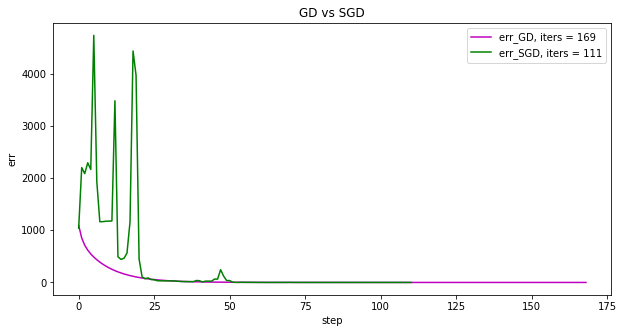

In [11]:
plt.figure(figsize=(10, 5))
plt.title('GD vs SGD')
plt.xlabel(r'step')
plt.ylabel(r'err')
plt.plot(range(len(err_GD)), err_GD, 'm-', label = f'err_GD, iters = {len(err_GD)}')
plt.plot(range(len(err_SGD)), err_SGD, 'g-', label = f'err_SGD, iters = {len(err_SGD)}')
plt.legend(loc='upper right')
plt.show()

2. Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [12]:
def usr_L2_norm(y):
    return np.sum(y**2)/len(y)

def usr_Stochastic_Gradient_Descent_and_L2(X, y, W, alpha = 1e-5):
    err = np.inf
    i = 0
    while err > 1e-6 and i < 15000:
        i += 1
        # генерируем случайный индекс объекта выборки
        t_indx = np.random.randint(n_samples)
        # вычислим y для этого индекса с учетом веса, своеобразный штраф 
        y_pred = np.dot(X[t_indx,:], W) + 1e-7 * usr_L2_norm(W)
        
        W -= 2 * alpha * 1/len(y) * ( X[t_indx,:].T.dot(y_pred - y[t_indx]))      
        # добавим 
        y_pred_mse = X.dot(W)
        err = usr_mse(y, y_pred_mse) 
        err_SGD_L2.append(err)
        
        if err <= error_REF:
            print( f'{i}:\tW:{W.round(3)},\terr={round(err,3)}')
            break        
            
        if i % 100 == 0:
            print( f'{i}:\tW:{W.round(3)},\terr={round(err,3)}')
    return W


In [13]:
X_sgd_L2, y_sgd_L2 = X.copy(), y.copy() #make_regression(n_samples, n_features, random_state=rng)
W_sgd_L2 = W_start.copy()
err_SGD_L2 = []
# X_sgd_L2, y_sgd_L2, W_sgd_L2

In [14]:
W_SGD_L2 = usr_Stochastic_Gradient_Descent_and_L2(X_sgd_L2, y_sgd_L2, W_sgd_L2, alpha = 2)
print(20*'=#=#')
y_SGD_L2_pred = np.dot(X_sgd_L2, W_SGD_L2)
W_SGD_L2#, y_SGD_L2_pred

70:	W:[18.093 54.419],	err=0.0
=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#


array([18.09318435, 54.41941765])

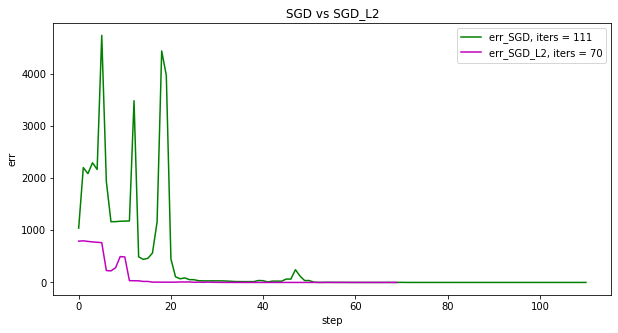

In [15]:
plt.figure(figsize=(10, 5))
plt.title('SGD vs SGD_L2')
plt.xlabel(r'step')
plt.ylabel(r'err')
plt.plot(range(len(err_SGD)), err_SGD, 'g-', label = f'err_SGD, iters = {len(err_SGD)}')
plt.plot(range(len(err_SGD_L2)), err_SGD_L2, 'm-', label = f'err_SGD_L2, iters = {len(err_SGD_L2)}')
plt.legend(loc='upper right')
plt.show()

3 _[опция]_. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [16]:
def usr_L1_norm(y):
    return np.sum(y**2)/len(y)

def usr_Stochastic_Gradient_Descent_and_L1(X, y, W, alpha = 1e-5):
    err = np.inf
    i = 0
    while err > 1e-6 and i < 15000:
        i += 1
        # генерируем случайный индекс объекта выборки
        t_indx = np.random.randint(n_samples)
        # вычислим y для этого индекса с учетом веса, своеобразный штраф 
        y_pred = np.dot(X[t_indx,:], W) + 1e-7 * usr_L1_norm(W)
        
        W -= 2 * alpha * 1/len(y) * ( X[t_indx,:].T.dot(y_pred - y[t_indx]))      
        # добавим 
        y_pred_mse = X.dot(W)
        err = usr_mse(y, y_pred_mse) 
        err_SGD_L1.append(err)
        
        if err <= error_REF:
            print( f'{i}:\tW:{W.round(3)},\terr={round(err,3)}')
            break        
            
        if i % 100 == 0:
            print( f'{i}:\tW:{W.round(3)},\terr={round(err,3)}')
    return W


In [17]:
X_sgd_L1, y_sgd_L1 = X.copy(), y.copy() #make_regression(n_samples, n_features, random_state=rng)
W_sgd_L1 = W_start.copy()
err_SGD_L1 = []
# X_sgd_L1, y_sgd_L1, W_sgd_L1

In [18]:
W_SGD_L1 = usr_Stochastic_Gradient_Descent_and_L1(X_sgd_L1, y_sgd_L1, W_sgd_L1, alpha = 2)
print(20*'=#=#')
y_SGD_L1_pred = np.dot(X_sgd_L1, W_SGD_L1)
W_SGD_L1#, y_SGD_L1_pred

75:	W:[18.094 54.414],	err=0.0
=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#


array([18.09398244, 54.41385607])

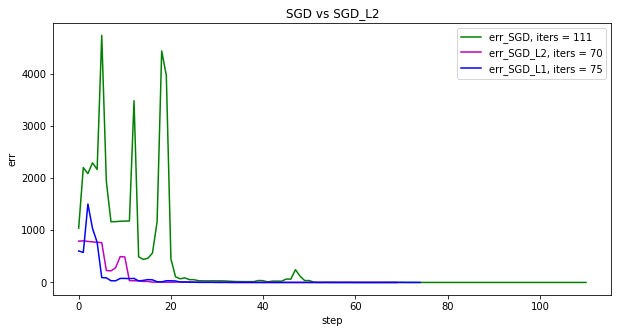

In [19]:
plt.figure(figsize=(10, 5))
plt.title('SGD vs SGD_L2')
plt.xlabel(r'step')
plt.ylabel(r'err')
plt.plot(range(len(err_SGD)), err_SGD, 'g-', label = f'err_SGD, iters = {len(err_SGD)}')
plt.plot(range(len(err_SGD_L2)), err_SGD_L2, 'm-', label = f'err_SGD_L2, iters = {len(err_SGD_L2)}')
plt.plot(range(len(err_SGD_L1)), err_SGD_L1, 'b-', label = f'err_SGD_L1, iters = {len(err_SGD_L1)}')
plt.legend(loc='best')
plt.show()